# Linear Regression

In [100]:
import requests
import time, os
import re
import pickle

import pandas as pd
import datetime
import numpy as np
import random

import seaborn as sns
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'jpeg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
# Read the CSV to confirm
df = pd.read_csv('df.csv')

## Data Exploration

In [3]:
df.head()

Name Release Date Retail Price Sale Price  \
0  air-jordan-11-retro-playoffs-2019   12/14/2019         $220       $348   
1  air-jordan-11-retro-playoffs-2019   12/14/2019         $220       $359   
2  air-jordan-11-retro-playoffs-2019   12/14/2019         $220       $364   
3  air-jordan-11-retro-playoffs-2019   12/14/2019         $220       $325   
4  air-jordan-11-retro-playoffs-2019   12/14/2019         $220       $345   

   Size                  Sale Date         52wk High|Low 12mo Trade Range  \
0   8.0  Thursday, October 1, 2020  High $360 | Low $171      $336 - $360   
1   8.5    Friday, October 2, 2020  High $367 | Low $180      $351 - $377   
2   9.0  Thursday, October 1, 2020  High $382 | Low $190      $353 - $375   
3   9.5  Thursday, October 1, 2020  High $398 | Low $213      $303 - $347   
4  10.0    Friday, October 2, 2020  High $387 | Low $210      $331 - $359   

  Volatility # of Sales Price Premium Avg Resale Price  
0       3.3%       4500         58.2%             $290  
1       3.6%       5004         65.6%             $294  
2       3.1%       6784         65.5%             $294  
3       6.8%       7143         47.7%             $295  
4       4.0%       8147         56.8%             $295

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1006 non-null   object
 1   Release Date      944 non-null    object
 2   Retail Price      931 non-null    object
 3   Sale Price        1006 non-null   object
 4   Size              1006 non-null   object
 5   Sale Date         379 non-null    object
 6   52wk High|Low     1006 non-null   object
 7   12mo Trade Range  1006 non-null   object
 8   Volatility        1006 non-null   object
 9   # of Sales        1006 non-null   object
 10  Price Premium     1006 non-null   object
 11  Avg Resale Price  648 non-null    object
dtypes: object(12)
memory usage: 94.4+ KB


In [5]:
# We need to make a column for Brand from the Name column

# Remove forward slashes

df['Name'] = df['Name'].str.replace('/','')

df['Brand'] = df['Name']

for i in range(len(df['Brand'])):
    if 'jordan' in df['Brand'][i]:
        df['Brand'][i] = 'Jordan'
    elif 'nike' in df['Name'][i]:
        df['Brand'][i] = 'Nike'
    elif 'adidas' in df['Name'][i]:
        df['Brand'][i] = 'Adidas'
    else:
        df['Brand'][i] = 'Other'

In [6]:
# Lets focus on only a few columns to use as our featurs for now

df_new = df[['Sale Price','Brand','Release Date','Sale Date',
             '# of Sales','Volatility','Price Premium']]

In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sale Price     1006 non-null   object
 1   Brand          1006 non-null   object
 2   Release Date   944 non-null    object
 3   Sale Date      379 non-null    object
 4   # of Sales     1006 non-null   object
 5   Volatility     1006 non-null   object
 6   Price Premium  1006 non-null   object
dtypes: object(7)
memory usage: 55.1+ KB


In [8]:
df_new.describe()

Sale Price   Brand Release Date                  Sale Date # of Sales  \
count        1006    1006          944                        379       1006   
unique        431       4          548                         16        654   
top            --  Jordan   10/01/2020  Saturday, October 3, 2020         --   
freq          159     381           15                        183        168   

       Volatility Price Premium  
count        1006          1006  
unique        316           669  
top            --            --  
freq          188           168

In [9]:
df_new.dtypes

Sale Price       object
Brand            object
Release Date     object
Sale Date        object
# of Sales       object
Volatility       object
Price Premium    object
dtype: object

In [10]:
## SALE PRICE

# Let's convert our columns so they're in a workable format

# Convert Sale Price to int \
# ',' and '$' are removed and the '--' were converted to 0

df_new["Sale Price"] = df_new['Sale Price'] \
    .str.replace(',','').str.replace('$','').str.replace('--','100').astype(int)

<ipython-input-10-d75644c60d79>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Sale Price"] = df_new['Sale Price'] \


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              1006 non-null   object
 1   Release Date      944 non-null    object
 2   Retail Price      931 non-null    object
 3   Sale Price        1006 non-null   object
 4   Size              1006 non-null   object
 5   Sale Date         379 non-null    object
 6   52wk High|Low     1006 non-null   object
 7   12mo Trade Range  1006 non-null   object
 8   Volatility        1006 non-null   object
 9   # of Sales        1006 non-null   object
 10  Price Premium     1006 non-null   object
 11  Avg Resale Price  648 non-null    object
 12  Brand             1006 non-null   object
dtypes: object(13)
memory usage: 102.3+ KB


In [12]:
df_new['Sale Price'].describe()

# Really high standard deviation, let's look at the distribution

count     1006.000000
mean       569.068588
std       1617.254856
min         28.000000
25%        120.000000
50%        250.000000
75%        456.500000
max      34000.000000
Name: Sale Price, dtype: float64

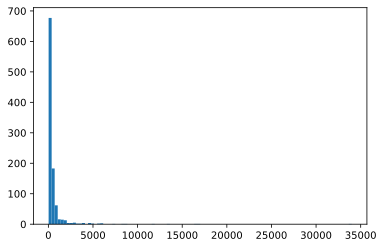

In [13]:
plt.hist(df_new['Sale Price'], bins=100);

# There appears to be HUGE outliers that may be skewing the data

In [14]:
df_new[df_new['Sale Price'] > 1000].sort_values('Sale Price', ascending=False)

Sale Price   Brand Release Date                  Sale Date # of Sales  \
530       34000    Nike   10/04/2016                        NaN          1   
500       16725  Jordan   11/23/2015                        NaN          6   
511       16500    Nike   07/27/2009                        NaN          3   
465       13333    Nike   09/08/2011                        NaN         16   
384       11719    Nike   03/01/2002                        NaN          4   
..          ...     ...          ...                        ...        ...   
295        1050  Adidas   11/14/2015    Friday, October 2, 2020        188   
108        1050  Jordan   06/09/2018  Saturday, October 3, 2020       2497   
377        1043   Other   04/03/2014  Saturday, October 3, 2020         42   
215        1030    Nike   07/27/2018  Saturday, October 3, 2020       1396   
410        1022    Nike   04/27/2017                        NaN        100   

    Volatility Price Premium  
530         --       $34,000  
500      19.8%       $12,138  
511       3.8%       $15,667  
465      14.3%       $11,295  
384     124.5%       $28,917  
..         ...           ...  
295      17.0%        425.0%  
108       5.8%        366.7%  
377      27.5%        317.2%  
215      13.6%        543.8%  
410      11.1%        437.9%  

[87 rows x 7 columns]

In [15]:
# Let's remove these outliers and see what happens to the data

df_new = df_new[df_new['Sale Price'] < 1000]

In [16]:
df_new['Sale Price'].describe()

count    913.000000
mean     282.960570
std      204.310427
min       28.000000
25%      110.000000
50%      223.000000
75%      374.000000
max      975.000000
Name: Sale Price, dtype: float64

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sale Price     913 non-null    int64 
 1   Brand          913 non-null    object
 2   Release Date   851 non-null    object
 3   Sale Date      348 non-null    object
 4   # of Sales     913 non-null    object
 5   Volatility     913 non-null    object
 6   Price Premium  913 non-null    object
dtypes: int64(1), object(6)
memory usage: 57.1+ KB


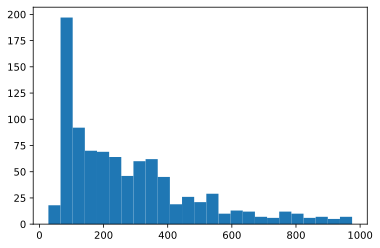

In [18]:
plt.hist(df_new['Sale Price'], bins=25);

# The distributions seems clearer now

In [19]:
## NUMBER OF SALES

df_new['# of Sales'] = df_new['# of Sales'].str.replace('--','100').astype(int)

In [20]:
df_new['# of Sales'].describe()

# Another huge standard deviation

count      913.000000
mean      2128.776561
std       4092.593426
min          1.000000
25%        100.000000
50%        504.000000
75%       2226.000000
max      38453.000000
Name: # of Sales, dtype: float64

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sale Price     913 non-null    int64 
 1   Brand          913 non-null    object
 2   Release Date   851 non-null    object
 3   Sale Date      348 non-null    object
 4   # of Sales     913 non-null    int64 
 5   Volatility     913 non-null    object
 6   Price Premium  913 non-null    object
dtypes: int64(2), object(5)
memory usage: 57.1+ KB


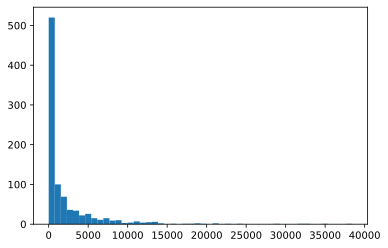

In [22]:
plt.hist(df_new['# of Sales'], bins=50);

# Several large ourtliers again

In [23]:
df_new[df_new['# of Sales'] > 6000].sort_values('# of Sales', ascending=False).head()

Sale Price   Brand Release Date                  Sale Date  # of Sales  \
44          345  Jordan   11/02/2019  Saturday, October 3, 2020       38453   
47          414  Jordan   10/26/2019  Saturday, October 3, 2020       35066   
875         292  Jordan   02/13/2020                        NaN       32928   
23          165  Jordan   04/01/2020  Saturday, October 3, 2020       32159   
50          260  Adidas   09/23/2019  Saturday, October 3, 2020       29127   

    Volatility Price Premium  
44        9.6%        115.6%  
47       14.5%        143.8%  
875       6.1%         71.8%  
23        3.1%         43.5%  
50       22.8%         18.2%

In [24]:
df_new = df_new[df_new['# of Sales'] < 6000]

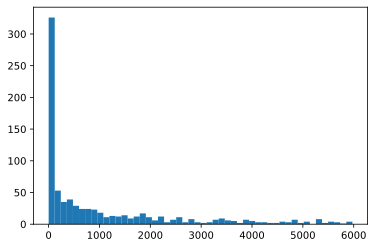

In [25]:
plt.hist(df_new['# of Sales'], bins=50);

In [26]:
df_new['# of Sales'].describe()

count     821.000000
mean     1044.976857
std      1429.402749
min         1.000000
25%       100.000000
50%       343.000000
75%      1493.000000
max      5974.000000
Name: # of Sales, dtype: float64

In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 821 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sale Price     821 non-null    int64 
 1   Brand          821 non-null    object
 2   Release Date   759 non-null    object
 3   Sale Date      271 non-null    object
 4   # of Sales     821 non-null    int64 
 5   Volatility     821 non-null    object
 6   Price Premium  821 non-null    object
dtypes: int64(2), object(5)
memory usage: 51.3+ KB


In [28]:
### Volatility

# Remove '%', replace '--' with low volatility since those shoes with '--' likely had little activity

df_new['Volatility'] = df_new['Volatility'].str.replace('%','').str.replace('--','2.0').astype(float)

In [29]:
df_new['Volatility'].describe()

count    821.000000
mean      14.817174
std       15.132529
min        0.800000
25%        5.300000
50%       13.000000
75%       19.500000
max      248.900000
Name: Volatility, dtype: float64

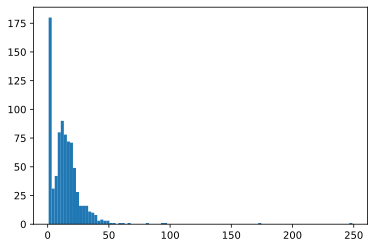

In [30]:
plt.hist(df_new['Volatility'], bins=100);

# Contains large outliers

In [31]:
df_new[df_new['Volatility'] > 50].sort_values('# of Sales', ascending=False).head()

Sale Price   Brand Release Date                Sale Date  # of Sales  \
278         161  Jordan   12/13/2018  Friday, October 2, 2020        1134   
308          30    Nike   07/12/2019  Friday, October 2, 2020         942   
965          82  Jordan   01/25/2018                      NaN         209   
934         284  Jordan   02/09/2018                      NaN         118   
977          80  Jordan   02/01/2018                      NaN          81   

     Volatility Price Premium  
278        61.3         46.4%  
308       174.0          $105  
965        66.0           $95  
934        80.2         49.5%  
977        54.6          $114

In [32]:
df_new = df_new[df_new['Volatility'] < 50]

In [33]:
df_new['Volatility'].describe()

count    810.000000
mean      13.742099
std        9.877553
min        0.800000
25%        5.300000
50%       12.900000
75%       19.300000
max       48.600000
Name: Volatility, dtype: float64

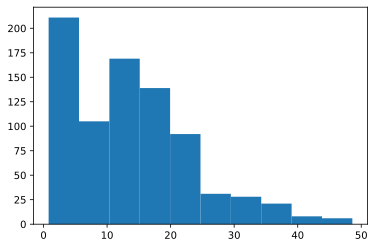

In [34]:
plt.hist(df_new['Volatility'], bins=10);

In [35]:
### Sale Date

# Most of the Sale Date values are for 10/3. Most of the sale date datapoints represent recent purchases

# Let's fill the NaN values with current purchases data

df_new['Sale Date'].fillna('Saturday, October 3, 2020', inplace=True)

In [36]:
# Convert to datetime

df_new['Sale Date'] = pd.to_datetime(df_new['Sale Date']) 

In [37]:
### Release Date

# Convert to datetime column

df_new['Release Date'] = pd.to_datetime(df_new['Release Date'])

In [38]:
df_new['Release Date'].isna().sum()

61

In [39]:
# Remove NaNs

df_new.dropna(inplace=True)

In [40]:
### Age

df_new['Age'] = (df_new['Sale Date'] - df_new['Release Date'])/365

In [41]:
# Rearrange columns

df_new = df_new[['Sale Price','Brand','Release Date','Sale Date',
                 'Age','# of Sales','Volatility','Price Premium']]

In [42]:
df_new.dtypes

Sale Price                 int64
Brand                     object
Release Date      datetime64[ns]
Sale Date         datetime64[ns]
Age              timedelta64[ns]
# of Sales                 int64
Volatility               float64
Price Premium             object
dtype: object

In [43]:
df_new['Age']

0             0 days 19:12:00
1      0 days 19:15:56.712328
7             0 days 19:12:00
9      0 days 19:15:56.712328
10     2 days 20:46:41.095890
                ...          
1001   2 days 11:26:27.945205
1002   1 days 08:13:09.041095
1003   0 days 15:19:13.972602
1004   2 days 18:08:52.602739
1005   1 days 14:39:46.849315
Name: Age, Length: 749, dtype: timedelta64[ns]

In [44]:
df_new.dtypes

Sale Price                 int64
Brand                     object
Release Date      datetime64[ns]
Sale Date         datetime64[ns]
Age              timedelta64[ns]
# of Sales                 int64
Volatility               float64
Price Premium             object
dtype: object

In [45]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Sale Price     749 non-null    int64          
 1   Brand          749 non-null    object         
 2   Release Date   749 non-null    datetime64[ns] 
 3   Sale Date      749 non-null    datetime64[ns] 
 4   Age            749 non-null    timedelta64[ns]
 5   # of Sales     749 non-null    int64          
 6   Volatility     749 non-null    float64        
 7   Price Premium  749 non-null    object         
dtypes: datetime64[ns](2), float64(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 52.7+ KB


In [46]:
# Convert timedelta to int

df_new['Age'] = df_new['Age'].dt.days

In [47]:
df_new.describe()

# There's a data point for -12 days from release?

Sale Price         Age   # of Sales  Volatility
count  749.000000  749.000000   749.000000  749.000000
mean   286.502003    1.793057  1124.508678   14.207744
std    208.421625    3.118198  1469.377004    9.895117
min     30.000000   -1.000000     1.000000    0.800000
25%    111.000000    0.000000   100.000000    6.600000
50%    220.000000    1.000000   405.000000   13.100000
75%    379.000000    2.000000  1709.000000   19.600000
max    975.000000   25.000000  5974.000000   48.600000

In [48]:
df_new[df_new['Age'] < 0]

Sale Price   Brand Release Date  Sale Date  Age  # of Sales  Volatility  \
325         350  Adidas   2017-12-20 2017-12-14   -1         338        41.4   
616         100    Nike   2020-10-05 2020-10-03   -1         100         2.0   
656         100   Other   2020-10-10 2020-10-03   -1         100         2.0   
662         100   Other   2020-10-10 2020-10-03   -1         100         2.0   
684         100   Other   2020-10-14 2020-10-03   -1         100         2.0   
784         165    Nike   2020-10-08 2020-10-03   -1          35        13.2   
907         260  Jordan   2020-10-15 2020-10-03   -1          16        10.0   
947         377  Jordan   2020-10-11 2020-10-03   -1           5        18.3   
990         100  Jordan   2020-10-12 2020-10-03   -1         100         2.0   

    Price Premium  
325          $140  
616            --  
656            --  
662            --  
684            --  
784          $183  
907        108.0%  
947        121.8%  
990            --

In [49]:
# Remove the negatives, they make no sense for our purposes

df_new = df_new[df_new['Age'] >= 0]

In [50]:
df_new.describe()

Sale Price         Age   # of Sales  Volatility
count  740.000000  740.000000   740.000000  740.000000
mean   287.754054    1.827027  1136.977027   14.255000
std    209.031659    3.121764  1473.873782    9.851227
min     30.000000    0.000000     1.000000    0.800000
25%    115.000000    0.000000   100.000000    6.675000
50%    221.500000    1.000000   413.000000   13.150000
75%    381.000000    2.000000  1713.750000   19.600000
max    975.000000   25.000000  5974.000000   48.600000

In [51]:
### Price Premium

# Replace '--' with 1%. After reviewing some shoes with '--' values, it was determined these shoes do not resale
#   as often as more mainstream shoes. 

df_new['Price Premium'] = df_new['Price Premium'].str.replace(',','') \
    .str.replace('$','').str.replace('%','').str.replace('--','1.0').astype(float)

In [52]:
df_new.dtypes

Sale Price                int64
Brand                    object
Release Date     datetime64[ns]
Sale Date        datetime64[ns]
Age                       int64
# of Sales                int64
Volatility              float64
Price Premium           float64
dtype: object

In [53]:
df_new['Price Premium'].describe()

count    740.000000
mean     115.665000
std      123.460302
min        1.000000
25%       19.700000
50%       85.400000
75%      162.925000
max      959.000000
Name: Price Premium, dtype: float64

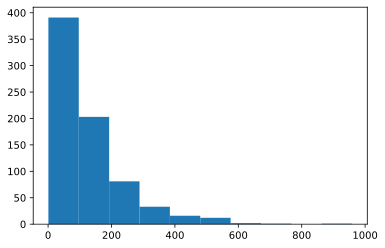

In [54]:
plt.hist(df_new['Price Premium'], bins=10);

# Some outliers, but not as many as the other features

In [55]:
df_new[df_new['Price Premium'] > 400].sort_values('# of Sales', ascending=False)

Sale Price   Brand Release Date  Sale Date  Age  # of Sales  Volatility  \
110         516    Nike   2020-03-14 2020-10-03    0        5692         3.6   
116         526    Nike   2019-10-31 2020-10-04    0        5521         4.9   
928         869  Jordan   2019-11-15 2020-10-03    0        2191        18.7   
845         399  Adidas   2020-06-26 2020-10-03    0        2003        19.3   
168         850  Jordan   2016-09-03 2020-10-03    4        1723        20.5   
807         762    Nike   2020-08-29 2020-10-03    0        1437        18.2   
280         840  Jordan   2018-11-07 2020-10-02    1         862         9.4   
312         665  Jordan   2019-06-17 2020-10-03    1         768        11.4   
719         540    Nike   2020-09-19 2020-10-03    0         730        10.3   
253         799    Nike   2018-08-10 2020-10-03    2         617        22.9   
320         975  Jordan   2018-05-05 2020-10-03    2         464        10.0   
886         975  Jordan   2018-05-05 2020-10-03    2         464        10.0   
321         900    Nike   2018-12-14 2020-10-03    1         435        17.0   
360         938    Nike   2017-03-18 2020-10-03    3         220         8.7   
406         550  Jordan   2016-01-30 2020-10-03    4         119        11.4   
424         851   Other   2014-07-20 2020-10-03    6          53        12.0   
426         651  Jordan   2001-10-06 2020-10-03   19          51        18.9   
461         750  Jordan   2007-11-09 2020-10-03   12          19        15.8   
488         910  Jordan   2008-07-03 2020-10-03   12           8        24.2   
492         902   Other   2016-10-20 2020-10-03    3           7        22.3   
498         745   Other   2008-07-12 2020-10-03   12           6        13.5   
503         475   Other   2006-03-25 2020-10-03   14           5        17.0   
507         640   Other   2016-11-26 2020-10-03    3           4        24.1   
515         461  Adidas   2016-01-01 2020-10-03    4           3        17.3   
525         431   Other   2012-08-31 2020-10-03    8           1         2.0   
526         750   Other   2011-11-18 2020-10-03    8           1         2.0   

     Price Premium  
110          416.0  
116          484.4  
928          568.5  
845          432.0  
168          431.3  
807          959.0  
280          425.0  
312          504.5  
719          562.0  
253          432.7  
320          509.4  
886          509.4  
321          592.3  
360          524.9  
406          563.0  
424          486.9  
426          551.0  
461          435.7  
488          420.0  
492          719.7  
498          645.0  
503          449.0  
507          491.0  
515          570.0  
525          431.0  
526          476.9

In [56]:
# Remove outliers

df_new = df_new[df_new['Price Premium'] < 400]

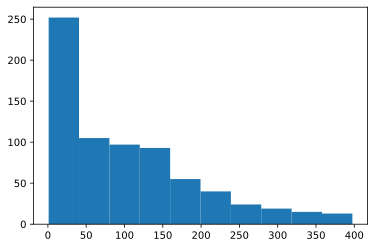

In [57]:
plt.hist(df_new['Price Premium'], bins=10);

In [58]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sale Price     713 non-null    int64         
 1   Brand          713 non-null    object        
 2   Release Date   713 non-null    datetime64[ns]
 3   Sale Date      713 non-null    datetime64[ns]
 4   Age            713 non-null    int64         
 5   # of Sales     713 non-null    int64         
 6   Volatility     713 non-null    float64       
 7   Price Premium  713 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(1)
memory usage: 50.1+ KB


In [59]:
# We no longer need Release Date and Sale Date

df_new = df_new[['Sale Price','Brand','Age','# of Sales','Volatility','Price Premium']]

In [60]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sale Price     713 non-null    int64  
 1   Brand          713 non-null    object 
 2   Age            713 non-null    int64  
 3   # of Sales     713 non-null    int64  
 4   Volatility     713 non-null    float64
 5   Price Premium  713 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.0+ KB


Our data is ready for linear regression

## Linear Regression

### Dummy Variables

In [61]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 1005
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sale Price     713 non-null    int64  
 1   Brand          713 non-null    object 
 2   Age            713 non-null    int64  
 3   # of Sales     713 non-null    int64  
 4   Volatility     713 non-null    float64
 5   Price Premium  713 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 39.0+ KB


In [62]:
df_new['Brand'].value_counts()

# Four different brands

Jordan    272
Nike      188
Other     147
Adidas    106
Name: Brand, dtype: int64

In [63]:
# Create dummy variables

df_new = pd.concat([df_new, pd.get_dummies(df_new['Brand'], drop_first=True)], axis=1)

In [64]:
df_new.drop(columns=['Brand'], inplace=True)

In [65]:
# Check out the correlations
df_new.corr()

Sale Price       Age  # of Sales  Volatility  Price Premium  \
Sale Price       1.000000  0.358438    0.129267    0.177418       0.627811   
Age              0.358438  1.000000   -0.230597    0.181769       0.241905   
# of Sales       0.129267 -0.230597    1.000000   -0.026031       0.148068   
Volatility       0.177418  0.181769   -0.026031    1.000000       0.314103   
Price Premium    0.627811  0.241905    0.148068    0.314103       1.000000   
Jordan           0.122743  0.146744    0.127249    0.261911       0.138723   
Nike            -0.026714 -0.134913    0.104394    0.059626       0.119938   
Other           -0.259104 -0.037750   -0.292034   -0.408018      -0.337592   

                 Jordan      Nike     Other  
Sale Price     0.122743 -0.026714 -0.259104  
Age            0.146744 -0.134913 -0.037750  
# of Sales     0.127249  0.104394 -0.292034  
Volatility     0.261911  0.059626 -0.408018  
Price Premium  0.138723  0.119938 -0.337592  
Jordan         1.000000 -0.469964 -0.400236  
Nike          -0.469964  1.000000 -0.304965  
Other         -0.400236 -0.304965  1.000000

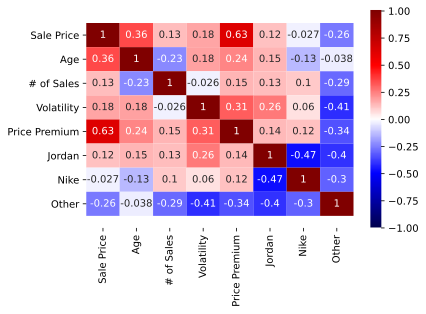

In [66]:
# Heat map

sns.heatmap(df_new.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

plt.gca().set_ylim(len(df_new.corr())+0.5, -0.5);  # quick fix to make sure viz isn't cut off

In [67]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(df_new, height=1.2, aspect=1.25);

### Simple OLS Regression

In [68]:
# Choose just the features for our columns
X = df_new[['Age', '# of Sales', 'Volatility', 'Price Premium', 'Jordan', 'Nike', 'Other']]

# Choose the response variable
y = df_new['Sale Price']

In [69]:
# With StatsModels
sm.add_constant(X).head()

const  Age  # of Sales  Volatility  Price Premium  Jordan  Nike  Other
0     1.0    0        4500         3.3           58.2       1     0      0
1     1.0    0        5004         3.6           65.6       1     0      0
7     1.0    0        4072         4.0           80.9       1     0      0
9     1.0    0        4008         6.0           81.8       1     0      0
10    1.0    2         150        11.6          150.0       0     0      0

In [70]:
#Create the model
model = sm.OLS(y, sm.add_constant(X)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     89.79
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           2.90e-93
Time:                        13:40:18   Log-Likelihood:                -4533.3
No. Observations:                 713   AIC:                             9083.
Df Residuals:                     705   BIC:                             9119.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           195.1518     18.044     10.815      0.000     159.725     230.578
Age              15.7682      1.934      8.154      0.000      11.972      19.565
# of Sales        0.0114      0.004      2.897      0.004       0.004       0.019
Volatility       -1.2199      0.608     -2.006      0.045      -2.414      -0.026
Price Premium     1.1351      0.063     18.100      0.000       1.012       1.258
Jordan          -56.8710     16.190     -3.513      0.000     -88.657     -25.085
Nike            -81.7266     17.133     -4.770      0.000    -115.365     -48.088
Other           -83.6818     19.359     -4.323      0.000    -121.690     -45.674
==============================================================================
Omnibus:                       74.582   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.018
Skew:                           0.671   Prob(JB):                     1.30e-29
Kurtosis:                       4.637   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2 too low

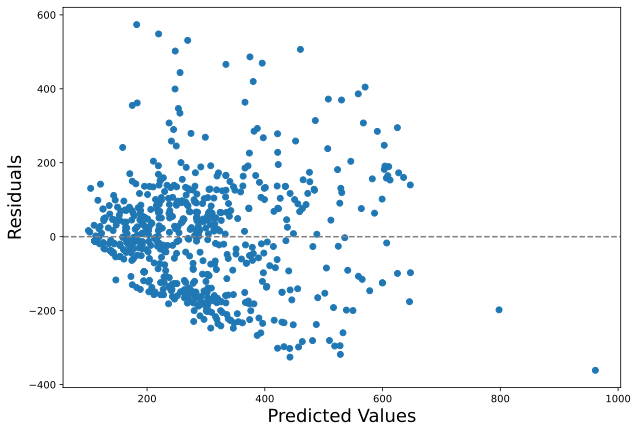

In [71]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(10, 7))
plt.scatter(fit.predict(), fit.resid)    #change this if working with sklearn

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

### Simple Validation Method

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

X, y = df_new[['Age', '# of Sales', 'Volatility', 'Price Premium', 'Jordan', 'Nike', 'Other']],\
    df_new['Sale Price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20)

In [115]:
# Split train and validate sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10)

In [116]:
#set up the 4 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

# Polynomial Regression with Ridge CV

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

lm_reg_poly = Ridge(alpha=1)

In [117]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

lm_reg_poly.fit(X_train_poly_scaled, y_train)
print(f'Degree 2 polynomial with RidgeCV val R^2: {lm_reg_poly.score(X_val_poly_scaled, y_val):.3f}')

Linear Regression val R^2: 0.372
Ridge Regression val R^2: 0.372
Degree 2 polynomial regression val R^2: 0.384
Degree 2 polynomial with RidgeCV val R^2: 0.422


In [118]:
# Test
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm.predict(X_test), squared=False):.3f}')

print(f'Ridge Regression val R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_reg.predict(X_test_scaled), squared=False):.3f}')

print(f'Polynomial Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_poly.predict(X_test_poly), squared=False):.3f}')

print(f'Polynomial with RidgeCV test R^2: {lm_reg_poly.score(X_test_poly_scaled, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_reg_poly.predict(X_test_poly_scaled), squared=False):.3f}')

Linear Regression val R^2: 0.487
RMSE: 136.897
Ridge Regression val R^2: 0.487
RMSE: 136.806
Polynomial Regression test R^2: 0.396
RMSE: 148.445
Polynomial with RidgeCV test R^2: 0.450
RMSE: 141.717


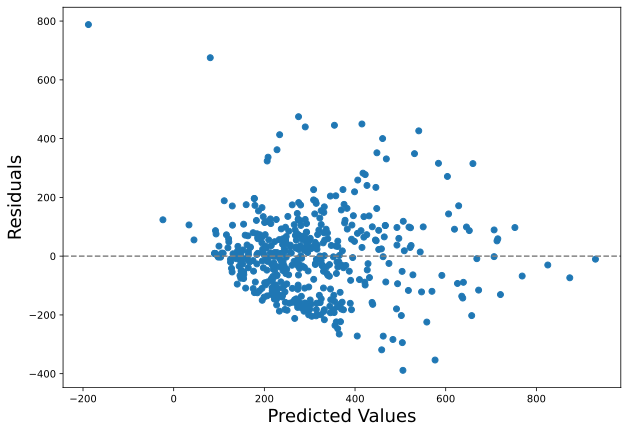

In [77]:
# Plot the residuals

X_poly = poly.fit_transform(X)
residuals = y - lm_poly.predict(X_poly)

plt.figure(figsize=(10, 7))
plt.scatter(lm_poly.predict(X_poly), residuals)   

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

# still so much variance in the residuals

### K-fold Cross Validation

In [78]:
from sklearn.model_selection import KFold

X, y = df_new[['Age', '# of Sales', 'Volatility', 'Price Premium', 'Jordan', 'Nike', 'Other']],\
    df_new['Sale Price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [79]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_poly_r2s, cv_lm_poly_ridge_r2s = [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):

    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 

    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=5)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))

    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

    #polyomial regression
    poly = PolynomialFeatures(degree=2) 
    lm_poly = LinearRegression()

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    #polyomial regression with Ridge CV
    lm_reg_poly = Ridge(alpha=5)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)
    lm_reg_poly.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_ridge_r2s.append(lm_reg_poly.score(X_val_poly_scaled, y_val))
    
    

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Polynomial scores: ', cv_lm_poly_r2s, '\n')
print('Polynomial with RidgeCV scores: ', cv_lm_poly_ridge_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')
print(f'Poly with Ridge mean cv r^2: {np.mean(cv_lm_poly_ridge_r2s):.3f} +- {np.std(cv_lm_poly_ridge_r2s):.3f}')

Simple regression scores:  [0.45639735083243305, 0.560334375221982, 0.36834499928267916, 0.5074951081267047, 0.48741019759926896]
Ridge scores:  [0.4574615625024353, 0.5592751300861072, 0.3677693216559492, 0.5075404023782972, 0.48906326803400313] 

Polynomial scores:  [0.5097080106504787, 0.6590861647835982, 0.5097075380511569, 0.43451596482190047, 0.5926120740168868] 

Polynomial with RidgeCV scores:  [0.5400554521573095, 0.6528851837414418, 0.4845549624000529, 0.5466333551836349, 0.6206777602278478] 

Simple mean cv r^2: 0.476 +- 0.064
Ridge mean cv r^2: 0.476 +- 0.063
Poly mean cv r^2: 0.541 +- 0.077
Poly with Ridge mean cv r^2: 0.569 +- 0.060


In [80]:
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm.predict(X_test), squared=False):.3f}')

print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_reg.predict(X_test_scaled), squared=False):.3f}')

print(f'Polynomial Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_poly.predict(X_test_poly), squared=False):.3f}')

print(f'Polynomial with RidgeCV test R^2: {lm_reg_poly.score(X_test_poly_scaled, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_reg_poly.predict(X_test_poly_scaled), squared=False):.3f}')

Linear Regression test R^2: 0.347
RMSE: 176.128
Ridge Regression test R^2: 0.348
RMSE: 176.089
Polynomial Regression test R^2: 0.439
RMSE: 163.305
Polynomial with RidgeCV test R^2: 0.418
RMSE: 166.340


In [81]:
# In the case of the 5-fold CV method, Simple and Ridge Regressions performed better than Polynomial.
#  This is the opposite if what we saw in the simple validation method. Out of the two methods, however, 
#  polynomial had a higher R^2 with the simple validation mathod.

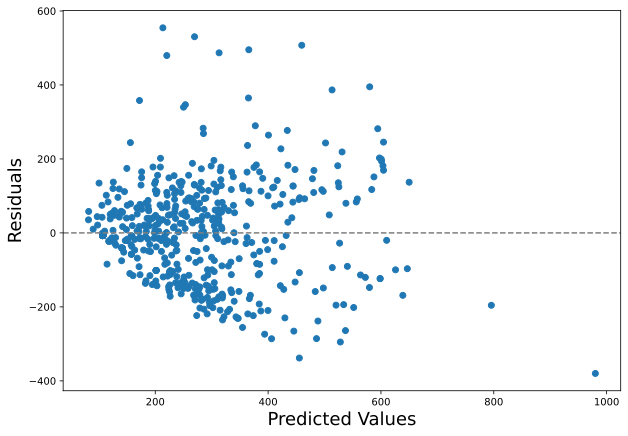

In [82]:
# Residual plot (SIMPLE)

residuals = y - lm.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(lm.predict(X), residuals)   

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

# still so much variance in the residuals

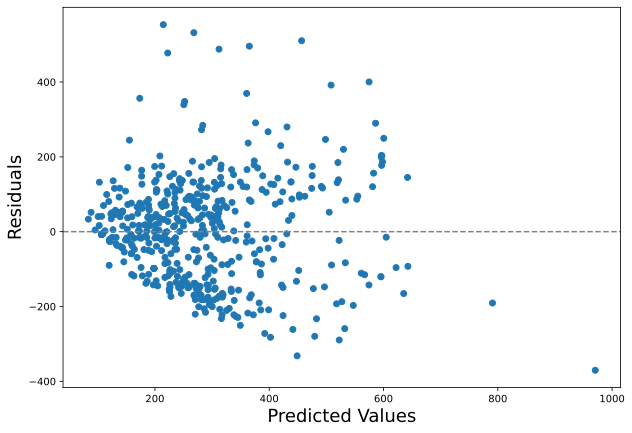

In [83]:
# Residual plot (RIDGE Regression)

X_scaled = scaler.fit_transform(X)

residuals = y - lm_reg.predict(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(lm_reg.predict(X_scaled), residuals)   

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

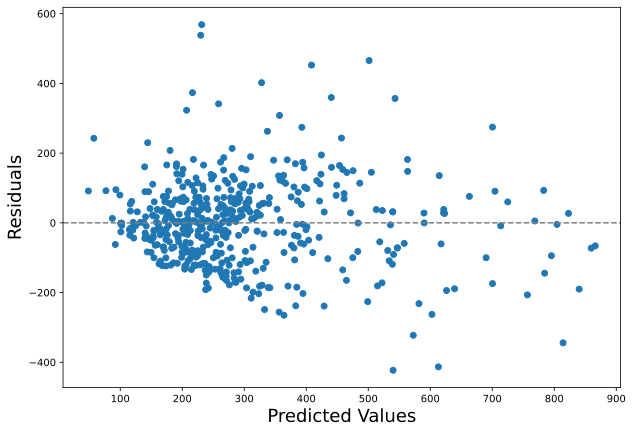

In [84]:
# Residual plot (Polynomial Regression)

X_poly = poly.fit_transform(X)
residuals = y - lm_poly.predict(X_poly)

plt.figure(figsize=(10, 7))
plt.scatter(lm_poly.predict(X_poly), residuals)   

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

# These residuals seem to be more spread out than the other plots

In [85]:
# Looks like residuals are more evenly spread out with Polynomial Regression

### With Feature Engineering

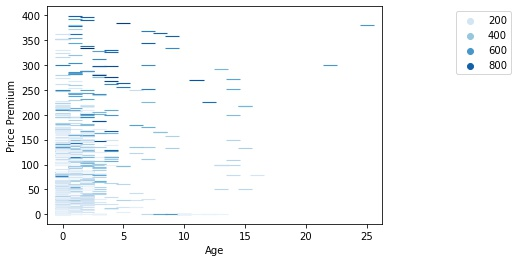

In [113]:
# There appears to be an interaction between # of Sales and Price Premium.
#  The relationship seems to multiplicative
#  Intepretation: Sneakerheads tend to pay more for sneakers aged 0-5 years that also have a higher price premium
#  Assumption: Why? It's about status. Same reason people pay $100 for Gucci t-shirt or buy a $1,000 prada bag.
#              Shoes older than 5 years start to become unwearable (adhesive weakens, paint peels, creases, etc.) 


sns_plot = sns.scatterplot(data=df_new, 
                x='Age', 
                y='Price Premium',
                hue='Sale Price',
                palette='Blues',
                s=200,
                marker='_')

plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right');

In [87]:
# New feature to demonstrate multiplicative interaction

df_new['Prem_Age'] = df_new['Price Premium'] * df_new['Age']

#### Feature Engineering with K-fold Cross Validation

In [88]:
# Run CV with our new feature

X, y = df_new[['Age', '# of Sales', 'Volatility', 'Price Premium', 'Jordan', 'Nike', 'Other','Prem_Age']],\
    df_new['Sale Price']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [89]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_poly_r2s, cv_lm_poly_ridge_r2s = [], [], [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):

    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 

    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=5)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))

    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

    #polyomial regression
    poly = PolynomialFeatures(degree=2) 
    lm_poly = LinearRegression()

    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    X_test_poly = poly.transform(X_test)
    lm_poly.fit(X_train_poly, y_train)
    cv_lm_poly_r2s.append(lm_poly.score(X_val_poly, y_val))
    
    #polyomial regression with Ridge CV
    lm_reg_poly = Ridge(alpha=5)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.transform(X_val_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)
    lm_reg_poly.fit(X_train_poly_scaled, y_train)
    cv_lm_poly_ridge_r2s.append(lm_reg_poly.score(X_val_poly_scaled, y_val))
    
    

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')
print('Polynomial scores: ', cv_lm_poly_r2s, '\n')
print('Polynomial with RidgeCV scores: ', cv_lm_poly_ridge_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Poly mean cv r^2: {np.mean(cv_lm_poly_r2s):.3f} +- {np.std(cv_lm_poly_r2s):.3f}')
print(f'Poly with Ridge mean cv r^2: {np.mean(cv_lm_poly_ridge_r2s):.3f} +- {np.std(cv_lm_poly_ridge_r2s):.3f}')

Simple regression scores:  [0.4340265306098644, 0.5625111568163821, 0.33935412327674164, 0.5065131397552769, 0.4854567748219524]
Ridge scores:  [0.42976830269321487, 0.5609938791123864, 0.3451607589483473, 0.5072169432360804, 0.48802818107384893] 

Polynomial scores:  [0.344113744682896, -0.7442397540474048, 0.5016202030650754, 0.5447130201724395, 0.6199704175144812] 

Polynomial with RidgeCV scores:  [0.5166650096493817, 0.6014701582431659, 0.4805119851505607, 0.5744735171733872, 0.6366028350253711] 

Simple mean cv r^2: 0.466 +- 0.075
Ridge mean cv r^2: 0.466 +- 0.074
Poly mean cv r^2: 0.253 +- 0.507
Poly with Ridge mean cv r^2: 0.562 +- 0.057


In [90]:
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm.predict(X_test), squared=False):.3f}')

print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_reg.predict(X_test_scaled), squared=False):.3f}')

print(f'Polynomial Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_poly.predict(X_test_poly), squared=False):.3f}')

print(f'Polynomial with RidgeCV test R^2: {lm_reg_poly.score(X_test_poly_scaled, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_reg_poly.predict(X_test_poly_scaled), squared=False):.3f}')

Linear Regression test R^2: 0.329
RMSE: 178.658
Ridge Regression test R^2: 0.334
RMSE: 177.955
Polynomial Regression test R^2: 0.466
RMSE: 159.316
Polynomial with RidgeCV test R^2: 0.436
RMSE: 163.699


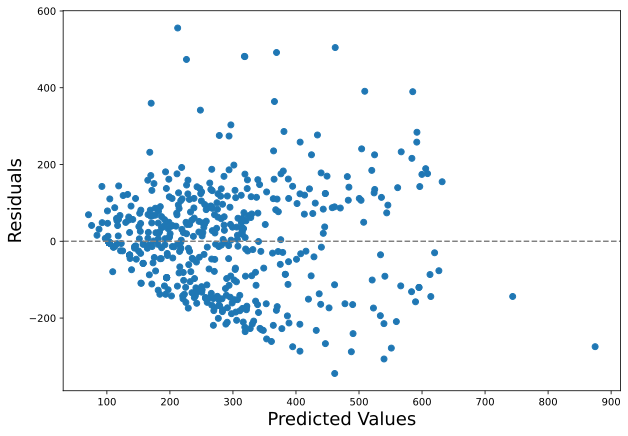

In [91]:
# Residual Plot

residuals = y - lm.predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(lm.predict(X), residuals)   

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

#### Feature Engineering with Simple Validation

In [92]:
# Run with Simple Validation

X, y = df_new[['Age', '# of Sales', 'Volatility', 'Price Premium', 'Jordan', 'Nike', 'Other','Prem_Age']],\
    df_new['Sale Price']

# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=20)

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [93]:
# Split train and validate sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=20)

In [94]:
#set up the 4 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()

# Polynomial Regression with Ridge CV

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

lm_reg_poly = Ridge(alpha=1)

In [95]:
#validate

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

lm_reg_poly.fit(X_train_poly_scaled, y_train)
print(f'Degree 2 polynomial with RidgeCV val R^2: {lm_reg_poly.score(X_val_poly_scaled, y_val):.3f}')

Linear Regression val R^2: 0.289
Ridge Regression val R^2: 0.288
Degree 2 polynomial regression val R^2: 0.299
Degree 2 polynomial with RidgeCV val R^2: -0.666


In [96]:
# Test
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm.predict(X_test), squared=False):.3f}')

print(f'Ridge Regression val R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_reg.predict(X_test_scaled), squared=False):.3f}')

print(f'Polynomial Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_poly.predict(X_test_poly), squared=False):.3f}')

print(f'Polynomial with RidgeCV test R^2: {lm_reg_poly.score(X_test_poly_scaled, y_test):.3f}')
print(f'RMSE: {mean_squared_error(y_test, lm_reg_poly.predict(X_test_poly_scaled), squared=False):.3f}')

Linear Regression val R^2: 0.494
RMSE: 135.897
Ridge Regression val R^2: 0.494
RMSE: 135.877
Polynomial Regression test R^2: 0.451
RMSE: 141.623
Polynomial with RidgeCV test R^2: 0.361
RMSE: 152.691


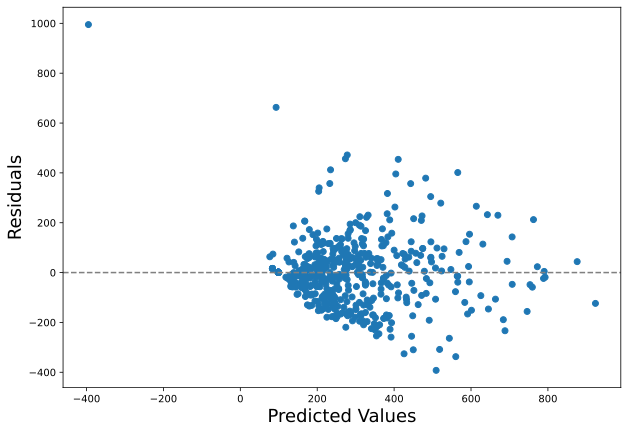

In [97]:
X_poly = poly.fit_transform(X)
residuals = y - lm_poly.predict(X_poly)

plt.figure(figsize=(10, 7))
plt.scatter(lm_poly.predict(X_poly), residuals)   

plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18);

## Conclusion
### Tests
#### Simple Linear Regression
##### Results: --
#### Linear Regression, Ridge LR, and PR with Simple Validation
##### Results: --
#### Linear Regression, Ridge LR, and PR with K-fold CV
##### Results: --
#### Above analyses with Feature Engineering
##### Results: --

### The model with the highest R-squared is Simple Validation

### The model with the highest level homoscedasticity is the Polynomial Regression with K-Fold CV

### Feature engineering had no effect on the model

### The best model appears to be the simplest model, the Simple Validation

In [98]:
df_new.sort_values('# of Sales', ascending=False).head(20)

Sale Price  Age  # of Sales  Volatility  Price Premium  Jordan  Nike  \
767         275    1        5974        33.2           57.1       1     0   
733         145    0        5970         9.1          139.0       1     0   
103         120    0        5954        17.6          200.0       0     1   
130         650    1        5874        19.8          195.5       0     0   
844         233    0        5802        14.2          323.6       0     0   
724         169    1        5708         6.5           35.2       0     0   
106         552    1        5648        11.5          142.5       1     0   
814         215    1        5596         8.0          138.9       1     0   
854         295    0        5583        15.0          126.9       0     1   
905         354    0        5498        19.8          195.0       1     0   
876         230    0        5457        17.2           21.1       1     0   
190         388    0        5456        12.1          223.3       0     1   
170         145    0        5355        39.7           45.0       0     1   
117         192    1        5350         8.1          148.0       1     0   
95          400    1        5295         9.9           33.2       0     0   
879         618    1        5270         9.8          286.3       1     0   
90          540    1        5266        16.4          237.5       1     0   
199         345    0        5263        15.6          165.4       1     0   
855         530    0        5261        13.2          140.9       0     0   
135         246    0        5258         7.6           29.5       1     0   

     Other  Prem_Age  
767      0      57.1  
733      0       0.0  
103      0       0.0  
130      0     195.5  
844      1       0.0  
724      1      35.2  
106      0     142.5  
814      0     138.9  
854      0       0.0  
905      0       0.0  
876      0       0.0  
190      0       0.0  
170      0       0.0  
117      0     148.0  
95       0      33.2  
879      0     286.3  
90       0     237.5  
199      0       0.0  
855      0       0.0  
135      0       0.0